---

**CONEXIÓN CON DRIVE**

---

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


---

**LIBRERÍAS**

---

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

---

**ANÁLISIS EXPLORATORIO DE DATOS (EDA)**

---

**Archivo: BTC-USD_Yahoo.csv**

In [ ]:
# Lee el archivo y carga el dataframe

df_btc_usd_yahoo = pd.read_csv('/content/drive/MyDrive/c16-109-n-data-bi/Data cruda/Pares/BTC-USD_Yahoo.csv')
df_btc_usd_yahoo.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-01,3746.713379,3850.913818,3707.231201,3843.520020,3843.520020,4324200990
1,2019-01-02,3849.216309,3947.981201,3817.409424,3943.409424,3943.409424,5244856836
2,2019-01-03,3931.048584,3935.685059,3826.222900,3836.741211,3836.741211,4530215219
3,2019-01-04,3832.040039,3865.934570,3783.853760,3857.717529,3857.717529,4847965467
4,2019-01-05,3851.973877,3904.903076,3836.900146,3845.194580,3845.194580,5137609824


In [ ]:
# Información del dataframe, datos faltantes y tipo de datos
df_btc_usd_yahoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1826 entries, 0 to 1825
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1826 non-null   object 
 1   Open       1826 non-null   float64
 2   High       1826 non-null   float64
 3   Low        1826 non-null   float64
 4   Close      1826 non-null   float64
 5   Adj Close  1826 non-null   float64
 6   Volume     1826 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 100.0+ KB


In [ ]:
df_btc_usd_yahoo.shape

(1826, 7)

In [ ]:
# Porcentajes de valores nulos por columnas
porcentaje_de_nulos= df_btc_usd_yahoo.isnull().mean()*100
porcentaje_de_nulos

Date         0.0
Open         0.0
High         0.0
Low          0.0
Close        0.0
Adj Close    0.0
Volume       0.0
dtype: float64

In [ ]:
# Columna 'Date'
# Modificación del tipo de datos
df_btc_usd_yahoo['Date']= df_btc_usd_yahoo['Date'].astype('datetime64')

In [ ]:
# Explora las principales métricas descriptivas de las variables cuantitativas
df_btc_usd_yahoo.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000,1.826000e+03
mean,24574.914299,25132.683570,23978.199624,24593.766878,24593.766878,2.903692e+10
std,16071.008463,16477.576869,15600.213992,16064.683022,16064.683022,1.814585e+10
min,3401.376465,3427.945557,3391.023682,3399.471680,3399.471680,4.324201e+09
25%,9667.602051,9835.049561,9512.193848,9672.332764,9672.332764,1.711804e+10
50%,22013.654297,22598.989258,21453.022461,22185.371094,22185.371094,2.578971e+10
75%,36701.667969,37640.723633,35383.756836,36793.921875,36793.921875,3.628123e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


---

**CORRELACION ENTRE VARIABLES**

---

In [ ]:
# Matriz de Correlacion
correlacion = df_btc_usd_yahoo.corr()
correlacion = df_btc_usd_yahoo.corr(numeric_only=True)

if correlacion.empty:
    print("La matriz de correlación está vacía después de eliminar NaN. Revisa tus datos.")
else:
    print("Matriz de correlación:")
    print(correlacion)

Matriz de correlación:
               Open      High       Low     Close  Adj Close    Volume
Open       1.000000  0.999113  0.998457  0.997913   0.997913  0.374498
High       0.999113  1.000000  0.998204  0.999059   0.999059  0.385936
Low        0.998457  0.998204  1.000000  0.998894   0.998894  0.353708
Close      0.997913  0.999059  0.998894  1.000000   1.000000  0.371662
Adj Close  0.997913  0.999059  0.998894  1.000000   1.000000  0.371662
Volume     0.374498  0.385936  0.353708  0.371662   0.371662  1.000000


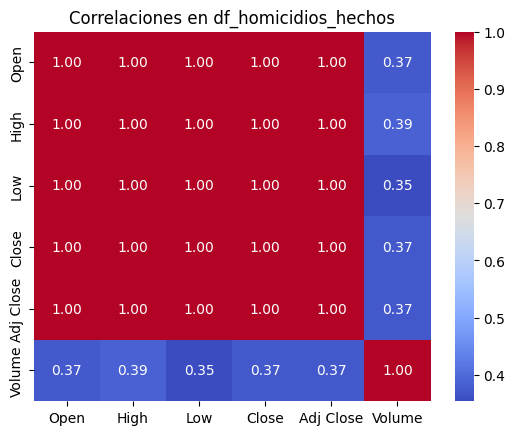

In [ ]:
# Mapa de Calor
correlacion = df_btc_usd_yahoo.corr()
correlacion = df_btc_usd_yahoo.corr(numeric_only=True)

# Matriz de correlación
if correlacion.empty:
    print("La matriz de correlación está vacía después de eliminar NaN. Revisa tus datos.")
else:
# Mapa de calor
    sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlaciones')
    plt.show()

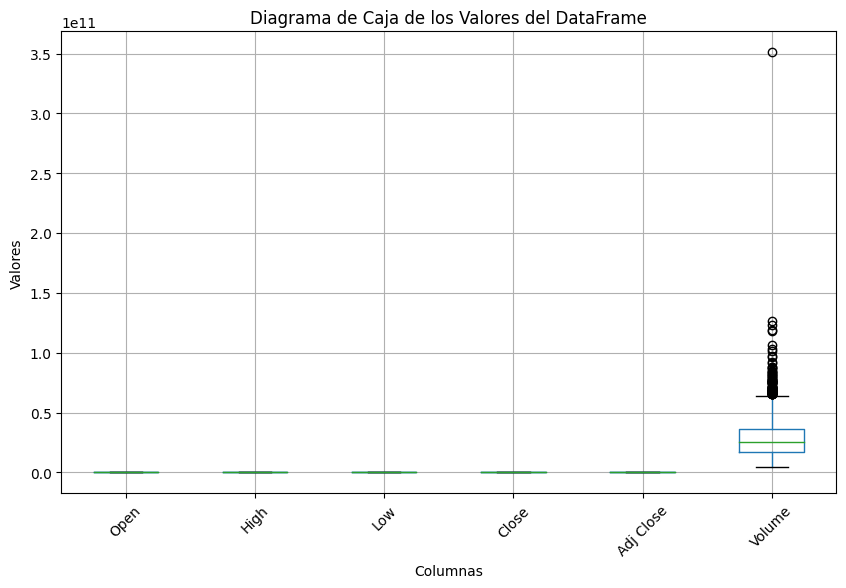

In [ ]:
# Obtiene las columnas numéricas del DataFrame
columnas_numericas = df_btc_usd_yahoo.select_dtypes(include=['float64', 'int64'])

# Calcula los valores atípicos para cada columna numérica
outliers_por_columna = {}
for columna in columnas_numericas.columns:
    valores_sin_nan = df_btc_usd_yahoo[columna].dropna()
    media_valores = valores_sin_nan.mean()
    desviacion_estandar_valores = valores_sin_nan.std()
    umbral = 3
    limite_inferior = media_valores - umbral * desviacion_estandar_valores
    limite_superior = media_valores + umbral * desviacion_estandar_valores
    outliers_por_columna[columna] = df_btc_usd_yahoo[(df_btc_usd_yahoo[columna] < limite_inferior) | (df_btc_usd_yahoo[columna] > limite_superior)]

# Crea un diagrama de caja para cada columna del DataFrame
plt.figure(figsize=(10, 6))
df_btc_usd_yahoo.boxplot()
plt.title('Diagrama de Caja de los Valores del DataFrame')
plt.xticks(rotation=45)
plt.ylabel('Valores')
plt.xlabel('Columnas')
plt.show()

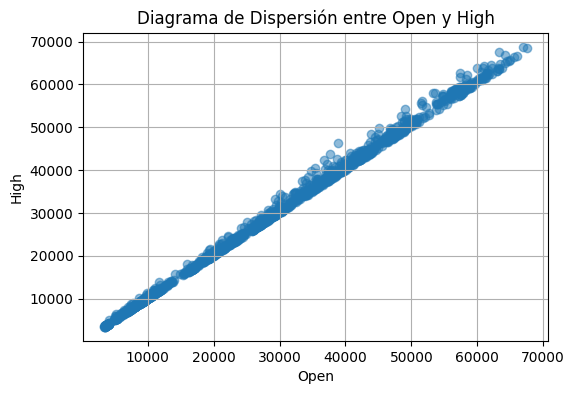

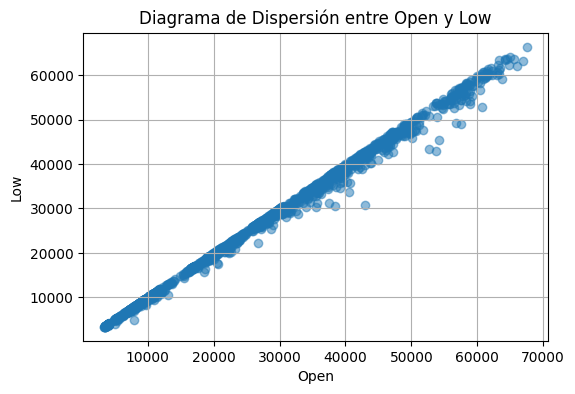

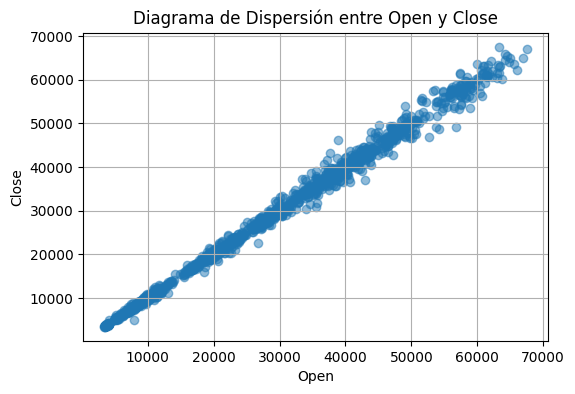

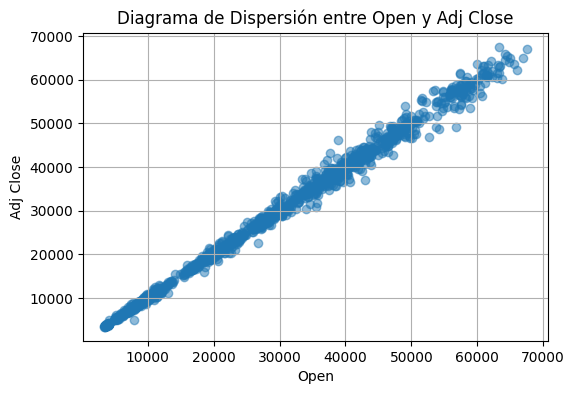

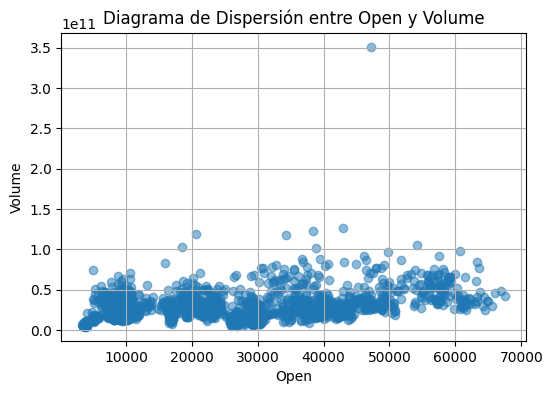

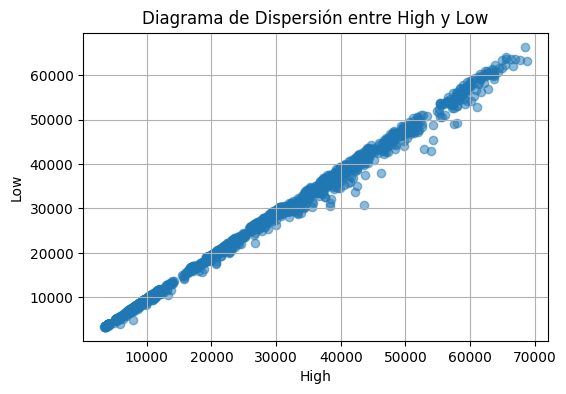

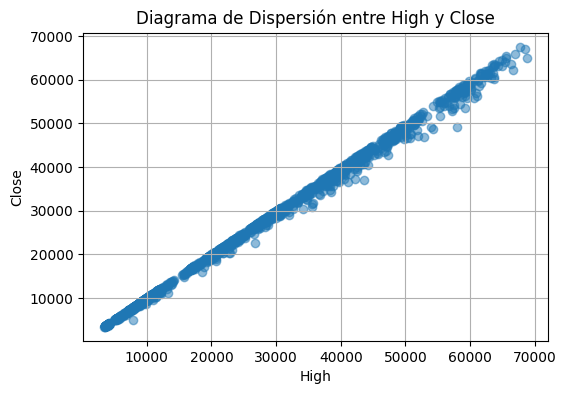

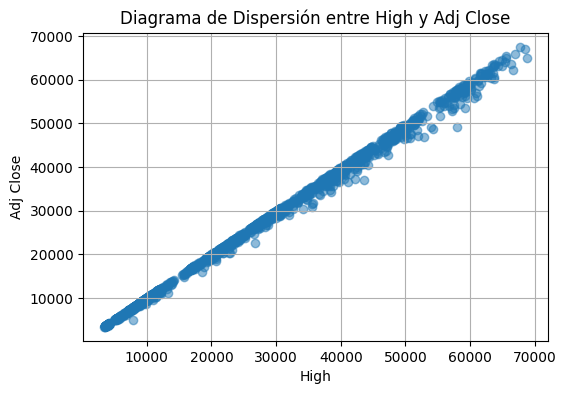

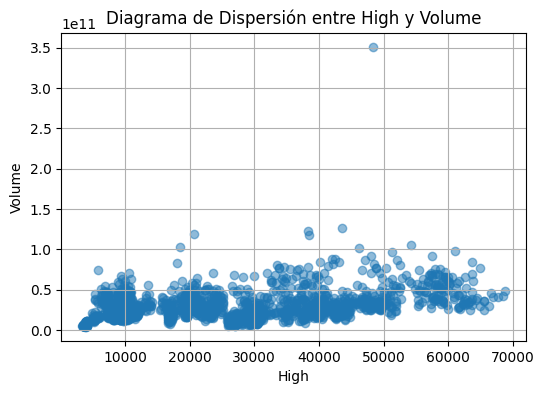

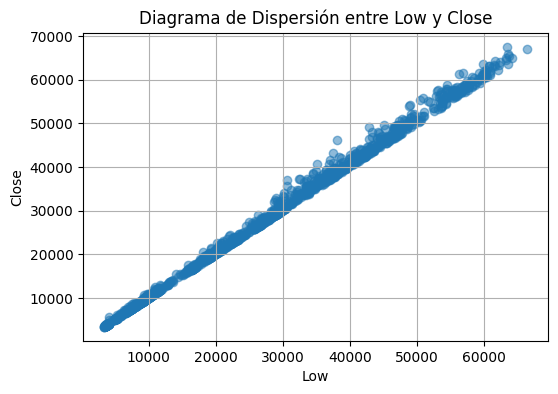

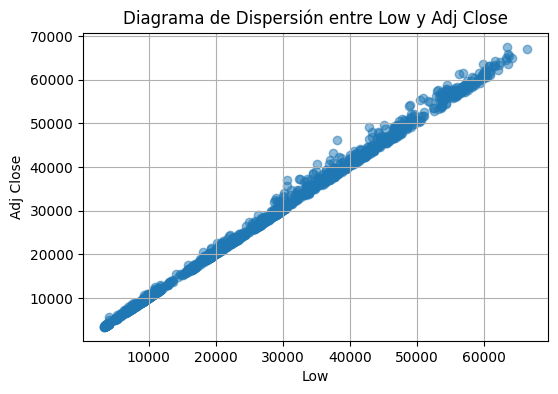

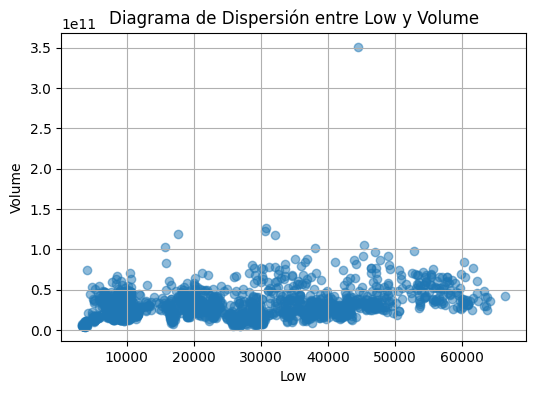

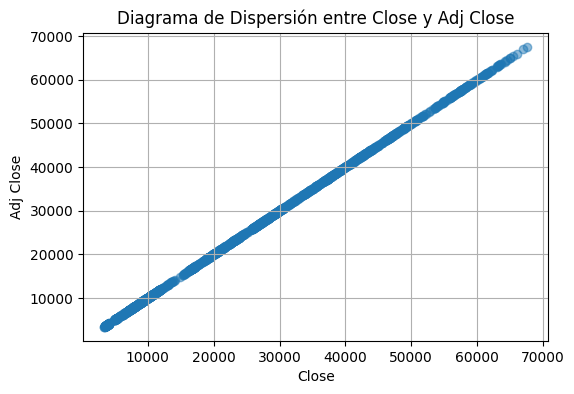

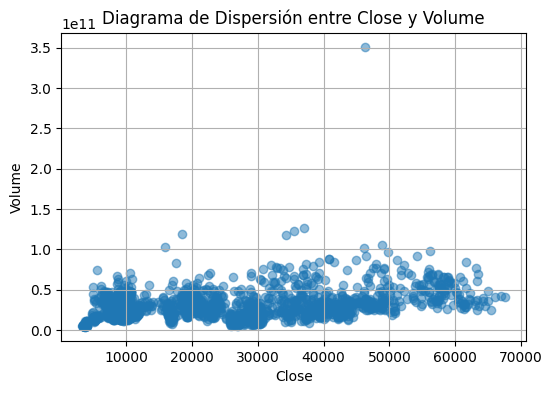

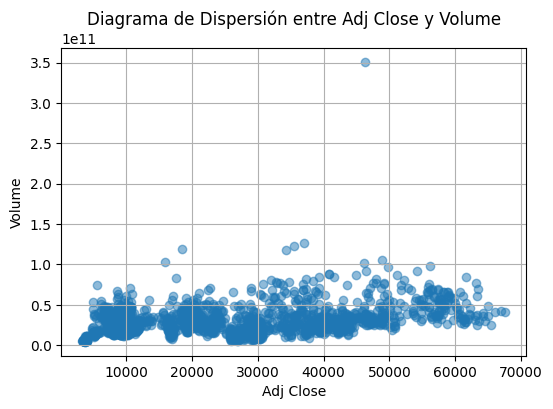

In [ ]:
# Obtiene las columnas numéricas del DataFrame
columnas_numericas = df_btc_usd_yahoo.select_dtypes(include=['float64', 'int64'])

# Crea un diagrama de dispersión para cada combinación de columnas numéricas
for i in range(len(columnas_numericas.columns)):
    for j in range(i+1, len(columnas_numericas.columns)):
        columna_x = columnas_numericas.columns[i]
        columna_y = columnas_numericas.columns[j]

        plt.figure(figsize=(6, 4))
        plt.scatter(df_btc_usd_yahoo[columna_x], df_btc_usd_yahoo[columna_y], alpha=0.5)
        plt.xlabel(columna_x)
        plt.ylabel(columna_y)
        plt.title(f'Diagrama de Dispersión entre {columna_x} y {columna_y}')
        plt.grid(True)
        plt.show()

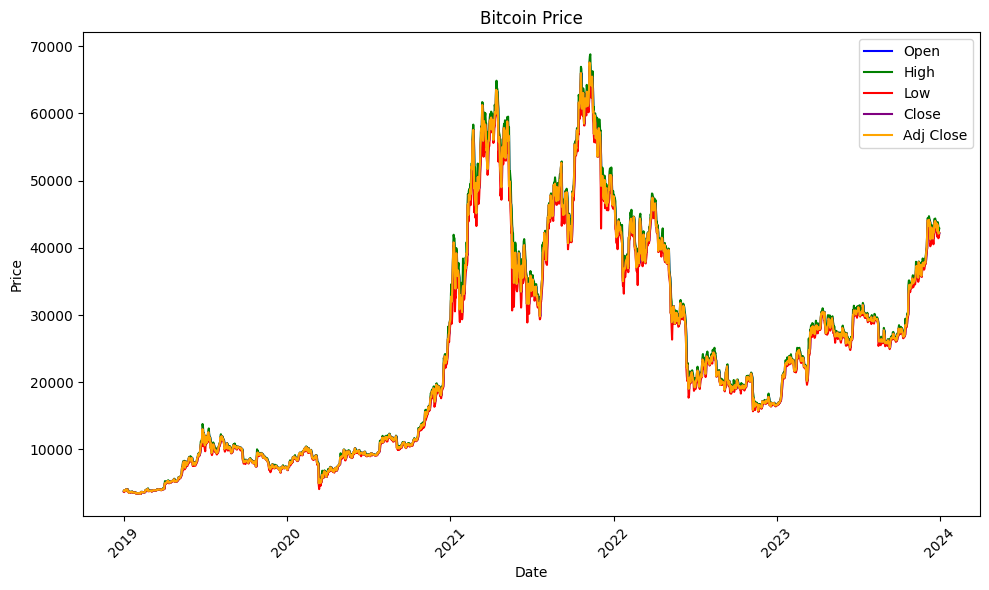

In [ ]:
plt.figure(figsize=(10, 6))

# Crea el gráfico de líneas para cada columna
plt.plot(df_btc_usd_yahoo['Date'], df_btc_usd_yahoo['Open'], label='Open', color='blue')
plt.plot(df_btc_usd_yahoo['Date'], df_btc_usd_yahoo['High'], label='High', color='green')
plt.plot(df_btc_usd_yahoo['Date'], df_btc_usd_yahoo['Low'], label='Low', color='red')
plt.plot(df_btc_usd_yahoo['Date'], df_btc_usd_yahoo['Close'], label='Close', color='purple')
plt.plot(df_btc_usd_yahoo['Date'], df_btc_usd_yahoo['Adj Close'], label='Adj Close', color='orange')

# Añade título y etiquetas de los ejes
plt.title('Bitcoin Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

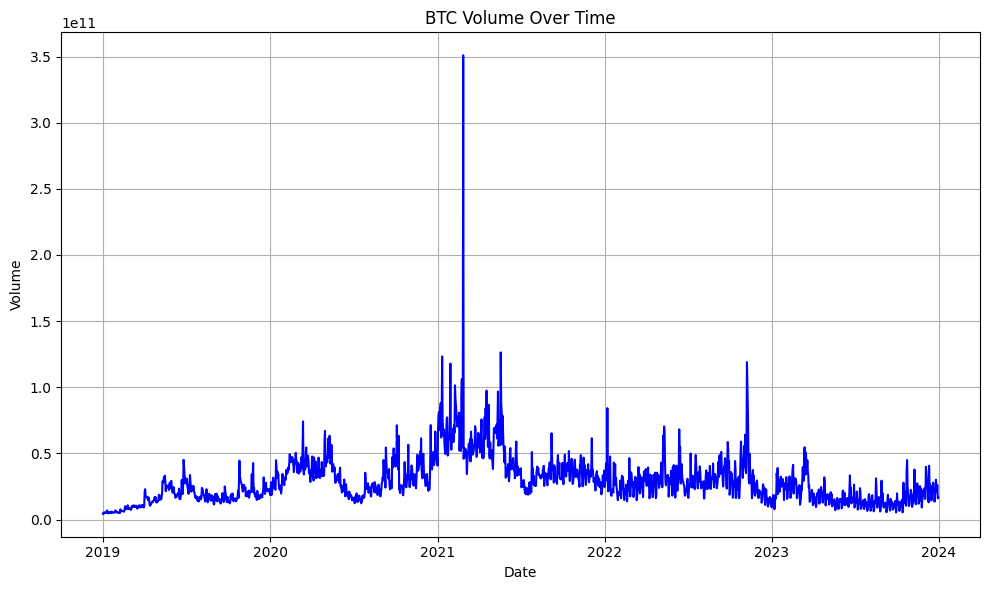

In [ ]:
# Crea un gráfico de líneas con las fechas y el volumen
plt.figure(figsize=(10, 6))
plt.plot(df_btc_usd_yahoo['Date'], df_btc_usd_yahoo['Volume'], color='blue', linestyle='-')
plt.title('BTC Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Se crea la columna con el nombre del par
df_btc_usd_yahoo['Pares']='btc/usd'

In [ ]:
df_btc_usd_yahoo.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Pares
0,2019-01-01,3746.713379,3850.913818,3707.231201,3843.520020,3843.520020,4324200990,btc/usd
1,2019-01-02,3849.216309,3947.981201,3817.409424,3943.409424,3943.409424,5244856836,btc/usd
2,2019-01-03,3931.048584,3935.685059,3826.222900,3836.741211,3836.741211,4530215219,btc/usd
3,2019-01-04,3832.040039,3865.934570,3783.853760,3857.717529,3857.717529,4847965467,btc/usd
4,2019-01-05,3851.973877,3904.903076,3836.900146,3845.194580,3845.194580,5137609824,btc/usd


---

**EXPORTA EL DATASET FINAL COMO ARCHIVO CSV**

---

In [ ]:
# Especifica el nombre del archivo CSV y la ruta donde deseas guardarlo
nombre_archivo_csv = 'df_btc_usd_yahoo_ETL.csv'
ruta_guardado = '/content/drive/MyDrive/c16-109-n-data-bi/Data limpia/'

# Combina la ruta y el nombre del archivo
ruta_completa = ruta_guardado + nombre_archivo_csv

# Exporta el DataFrame a un archivo CSV
df_btc_usd_yahoo.to_csv(ruta_completa, index=False)


# Imprime un mensaje de confirmación
print('DataFrame exportado exitosamente')

DataFrame exportado exitosamente


**Archivo: S&P500SPX-USD_Yahoo.csv**

In [ ]:
# Lee el archivo y carga el dataframe
df_sp500_usd_yahoo = pd.read_csv('/content/drive/MyDrive/c16-109-n-data-bi/Data cruda/Pares/S&P500SPX-USD_Yahoo.csv')
df_sp500_usd_yahoo.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-02,2476.959961,2519.489990,2467.469971,2510.030029,2510.030029,3733160000
1,2019-01-03,2491.919922,2493.139893,2443.959961,2447.889893,2447.889893,3858830000
2,2019-01-04,2474.330078,2538.070068,2474.330078,2531.939941,2531.939941,4234140000
3,2019-01-07,2535.610107,2566.159912,2524.560059,2549.689941,2549.689941,4133120000
4,2019-01-08,2568.110107,2579.820068,2547.560059,2574.409912,2574.409912,4120060000


In [ ]:
# Información del dataframe, datos faltantes y tipo de datos
df_sp500_usd_yahoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1258 non-null   object 
 1   Open       1258 non-null   float64
 2   High       1258 non-null   float64
 3   Low        1258 non-null   float64
 4   Close      1258 non-null   float64
 5   Adj Close  1258 non-null   float64
 6   Volume     1258 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 68.9+ KB


In [ ]:
df_sp500_usd_yahoo.shape

(1258, 7)

In [ ]:
# Porcentajes de valores nulos por columnas
porcentaje_de_nulos= df_sp500_usd_yahoo.isnull().mean()*100
porcentaje_de_nulos

Date         0.0
Open         0.0
High         0.0
Low          0.0
Close        0.0
Adj Close    0.0
Volume       0.0
dtype: float64

In [ ]:
# Columna 'Date'
# Modificación del tipo de datos
df_sp500_usd_yahoo['Date']= df_sp500_usd_yahoo['Date'].astype('datetime64')

In [ ]:
# Explora las principales métricas descriptivas de las variables cuantitativas
df_sp500_usd_yahoo.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,3754.862232,3777.666130,3730.870858,3755.831541,3755.831541,4.306625e+09
std,634.071030,635.888734,632.541336,634.050177,634.050177,1.064428e+09
min,2290.709961,2300.729980,2191.860107,2237.399902,2237.399902,1.296530e+09
25%,3135.457580,3144.062500,3114.027466,3128.659973,3128.659973,3.663025e+09
50%,3909.959961,3930.954956,3876.935059,3907.449951,3907.449951,4.052480e+09
75%,4307.459839,4335.917358,4274.812378,4305.090088,4305.090088,4.687198e+09
max,4804.509766,4818.620117,4780.979980,4796.560059,4796.560059,9.976520e+09


---

**CORRELACION ENTRE VARIABLES**

---

In [ ]:
# Matriz de Correlacion
correlacion = df_sp500_usd_yahoo.corr()
correlacion = df_sp500_usd_yahoo.corr(numeric_only=True)

if correlacion.empty:
    print("La matriz de correlación está vacía después de eliminar NaN. Revisa tus datos.")
else:
    print("Matriz de correlación:")
    print(correlacion)

Matriz de correlación:
               Open      High       Low     Close  Adj Close    Volume
Open       1.000000  0.999405  0.999129  0.998413   0.998413 -0.042512
High       0.999405  1.000000  0.998844  0.999151   0.999151 -0.032263
Low        0.999129  0.998844  1.000000  0.999252   0.999252 -0.060434
Close      0.998413  0.999151  0.999252  1.000000   1.000000 -0.047497
Adj Close  0.998413  0.999151  0.999252  1.000000   1.000000 -0.047497
Volume    -0.042512 -0.032263 -0.060434 -0.047497  -0.047497  1.000000


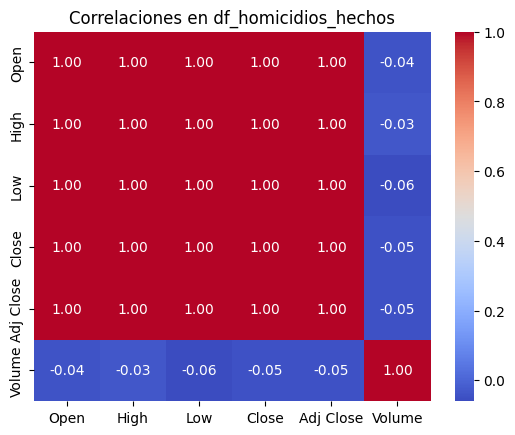

In [ ]:
# Mapa de Calor
correlacion = df_sp500_usd_yahoo.corr()
correlacion = df_sp500_usd_yahoo.corr(numeric_only=True)

# Matriz de correlación
if correlacion.empty:
    print("La matriz de correlación está vacía después de eliminar NaN. Revisa tus datos.")
else:
# Mapa de calor
    sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlaciones')
    plt.show()

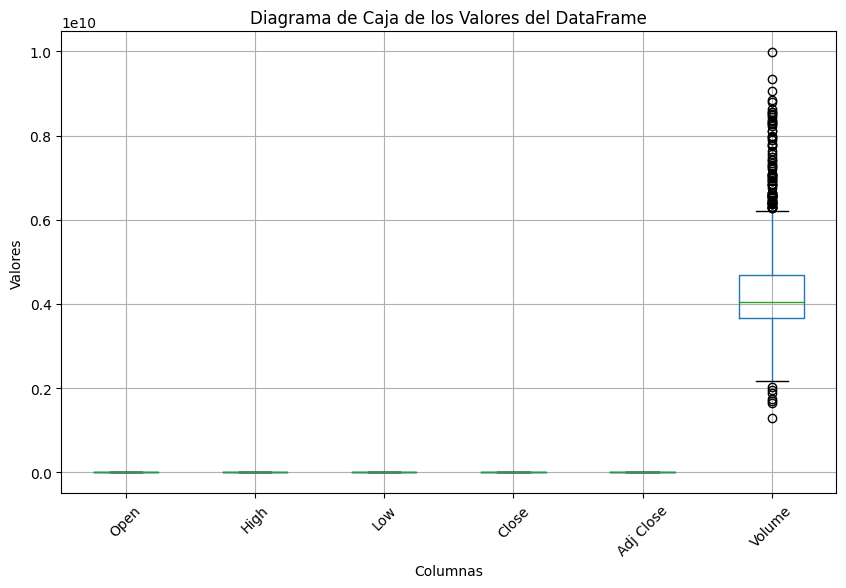

In [ ]:
# Obtiene las columnas numéricas del DataFrame
columnas_numericas = df_sp500_usd_yahoo.select_dtypes(include=['float64', 'int64'])

# Calcula los valores atípicos para cada columna numérica
outliers_por_columna = {}
for columna in columnas_numericas.columns:
    valores_sin_nan = df_sp500_usd_yahoo[columna].dropna()
    media_valores = valores_sin_nan.mean()
    desviacion_estandar_valores = valores_sin_nan.std()
    umbral = 3
    limite_inferior = media_valores - umbral * desviacion_estandar_valores
    limite_superior = media_valores + umbral * desviacion_estandar_valores
    outliers_por_columna[columna] = df_sp500_usd_yahoo[(df_sp500_usd_yahoo[columna] < limite_inferior) | (df_sp500_usd_yahoo[columna] > limite_superior)]

# Crea un diagrama de caja para cada columna del DataFrame
plt.figure(figsize=(10, 6))
df_sp500_usd_yahoo.boxplot()
plt.title('Diagrama de Caja de los Valores del DataFrame')
plt.xticks(rotation=45)
plt.ylabel('Valores')
plt.xlabel('Columnas')
plt.show()

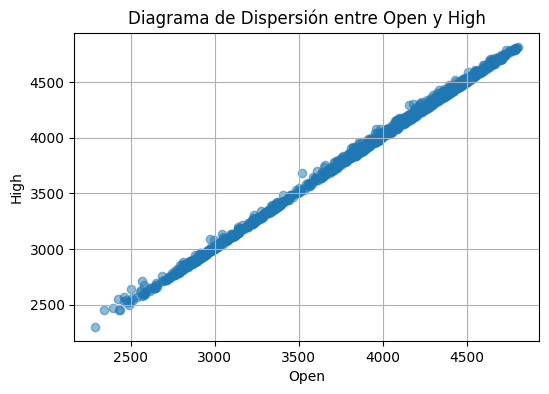

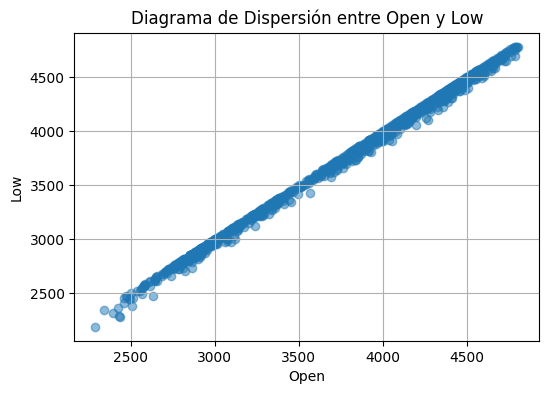

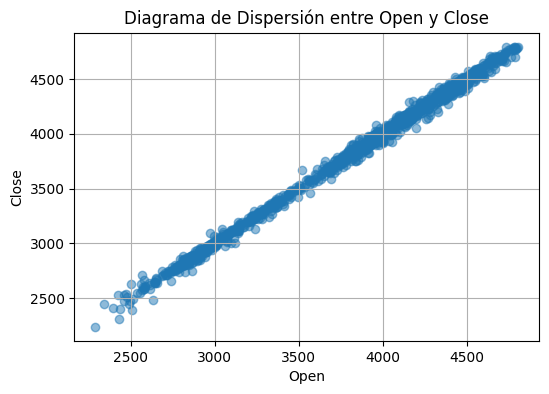

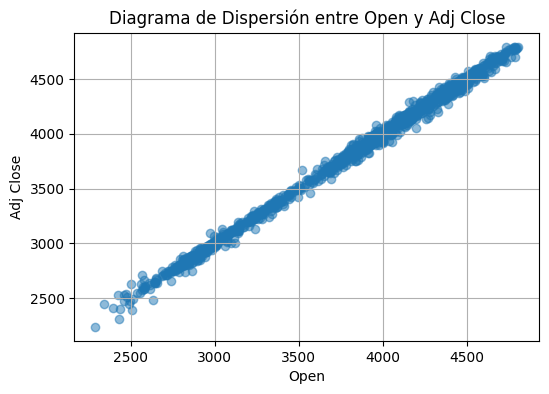

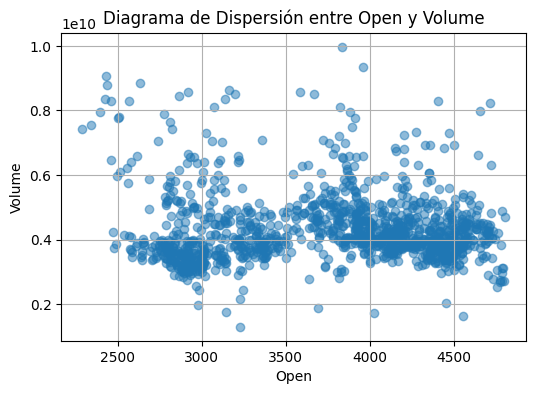

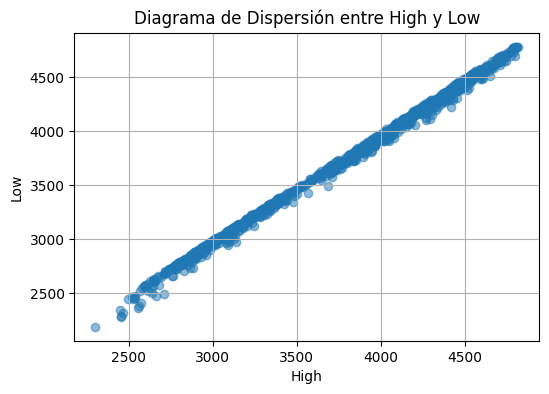

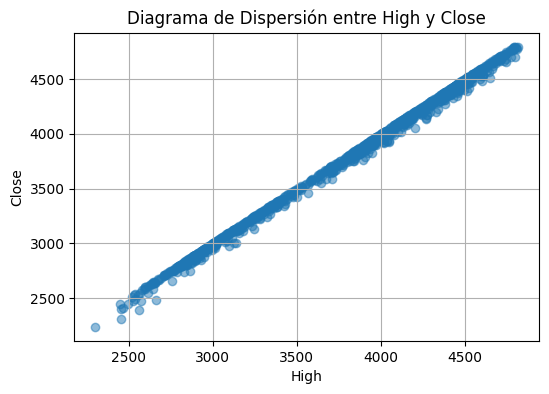

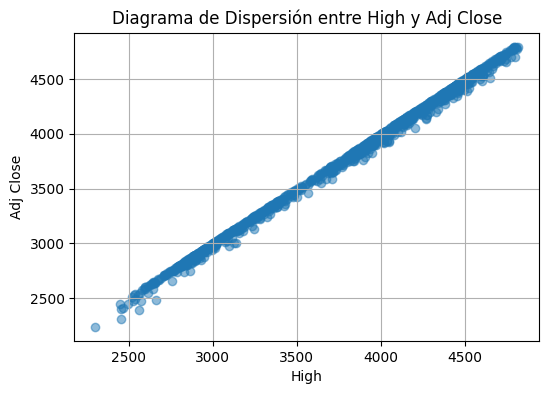

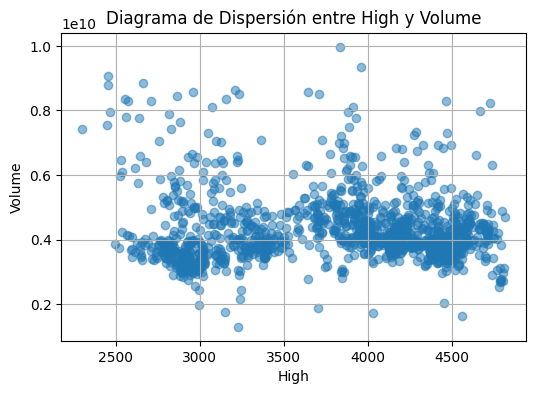

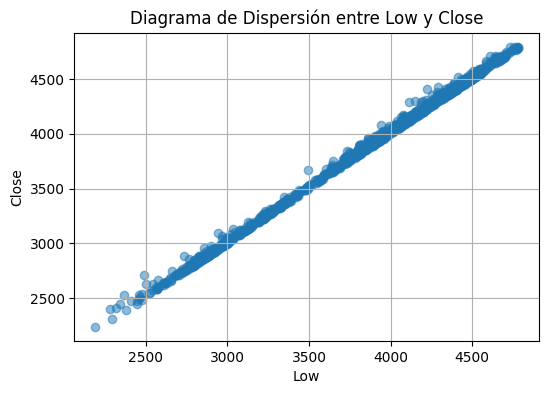

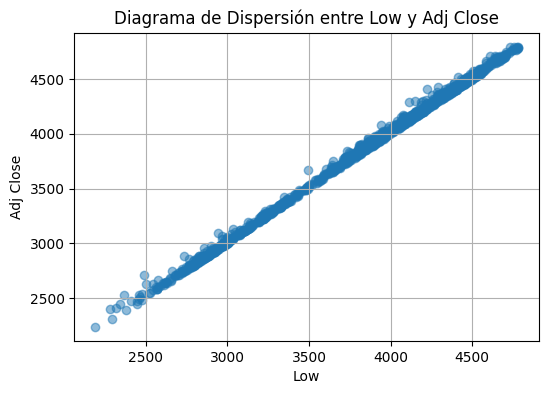

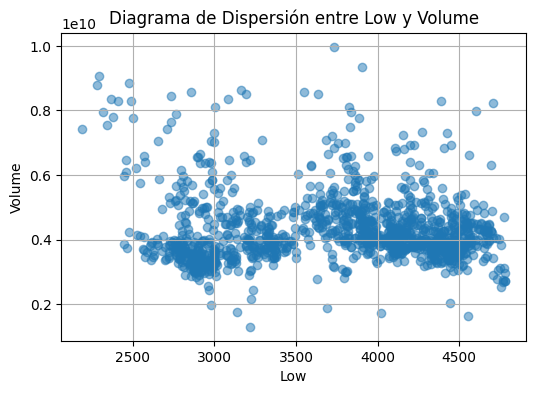

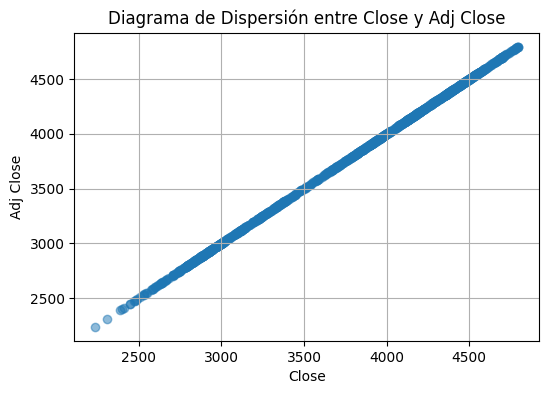

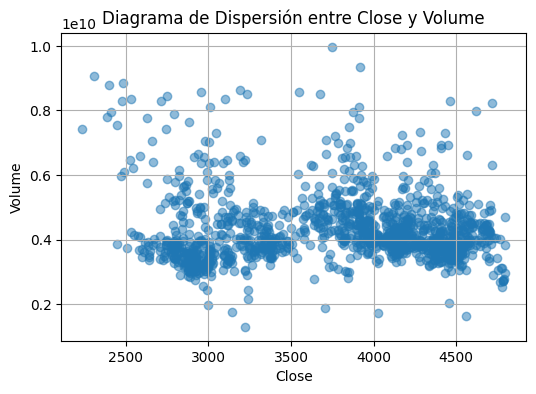

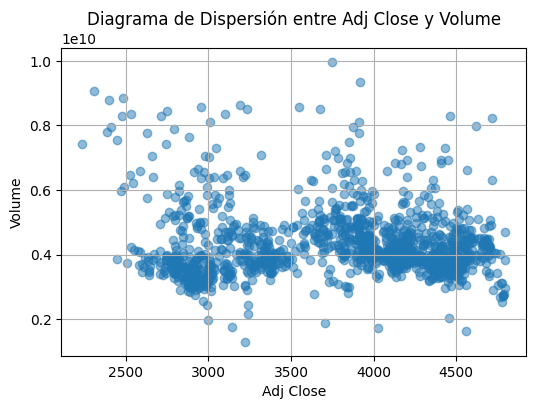

In [ ]:
# Obtiene las columnas numéricas del DataFrame
columnas_numericas = df_sp500_usd_yahoo.select_dtypes(include=['float64', 'int64'])

# Crea un diagrama de dispersión para cada combinación de columnas numéricas
for i in range(len(columnas_numericas.columns)):
    for j in range(i+1, len(columnas_numericas.columns)):
        columna_x = columnas_numericas.columns[i]
        columna_y = columnas_numericas.columns[j]

        plt.figure(figsize=(6, 4))
        plt.scatter(df_sp500_usd_yahoo[columna_x], df_sp500_usd_yahoo[columna_y], alpha=0.5)
        plt.xlabel(columna_x)
        plt.ylabel(columna_y)
        plt.title(f'Diagrama de Dispersión entre {columna_x} y {columna_y}')
        plt.grid(True)
        plt.show()

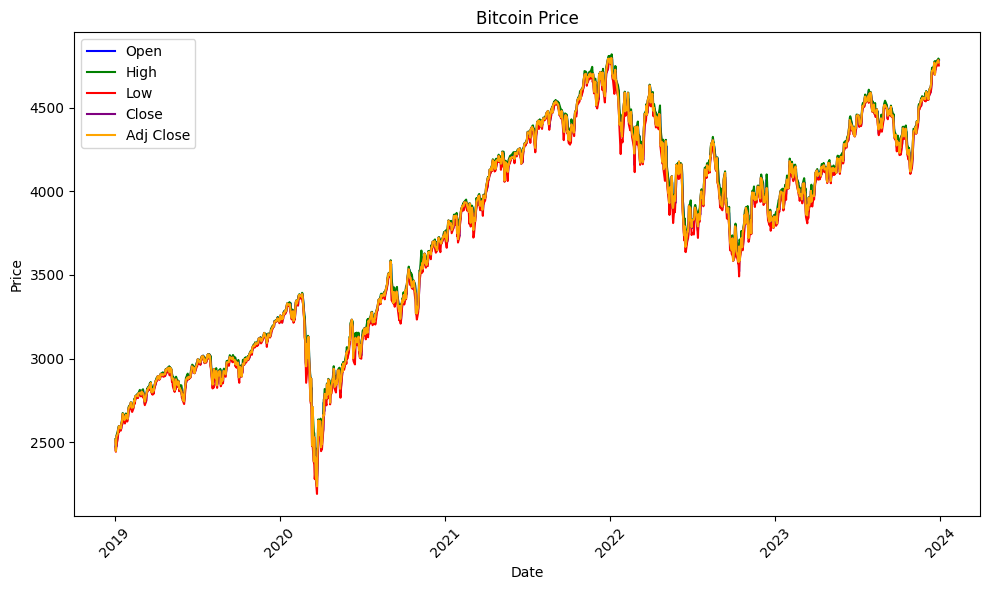

In [ ]:
plt.figure(figsize=(10, 6))

# Crea el gráfico de líneas para cada columna
plt.plot(df_sp500_usd_yahoo['Date'], df_sp500_usd_yahoo['Open'], label='Open', color='blue')
plt.plot(df_sp500_usd_yahoo['Date'], df_sp500_usd_yahoo['High'], label='High', color='green')
plt.plot(df_sp500_usd_yahoo['Date'], df_sp500_usd_yahoo['Low'], label='Low', color='red')
plt.plot(df_sp500_usd_yahoo['Date'], df_sp500_usd_yahoo['Close'], label='Close', color='purple')
plt.plot(df_sp500_usd_yahoo['Date'], df_sp500_usd_yahoo['Adj Close'], label='Adj Close', color='orange')

# Añade título y etiquetas de los ejes
plt.title('Bitcoin Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

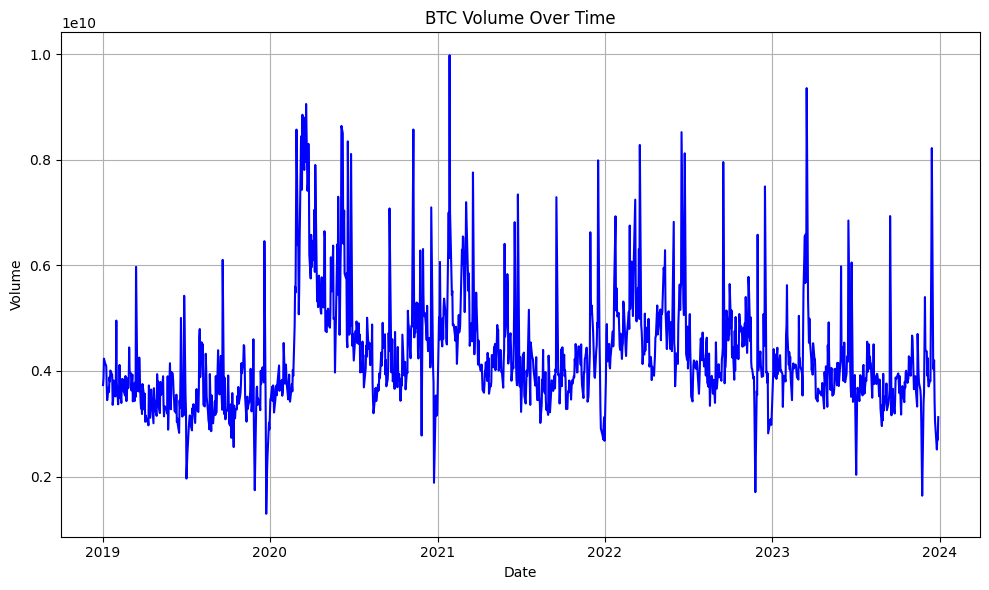

In [ ]:
# Se crea la columna con el nombre del par
df_sp500_usd_yahoo['Pares']='sp500/usd'

In [ ]:
df_sp500_usd_yahoo.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Pares
0,2019-01-02,2476.959961,2519.489990,2467.469971,2510.030029,2510.030029,3733160000,sp500/usd
1,2019-01-03,2491.919922,2493.139893,2443.959961,2447.889893,2447.889893,3858830000,sp500/usd
2,2019-01-04,2474.330078,2538.070068,2474.330078,2531.939941,2531.939941,4234140000,sp500/usd
3,2019-01-07,2535.610107,2566.159912,2524.560059,2549.689941,2549.689941,4133120000,sp500/usd
4,2019-01-08,2568.110107,2579.820068,2547.560059,2574.409912,2574.409912,4120060000,sp500/usd


---

**EXPORTA EL DATASET FINAL COMO ARCHIVO CSV**

---

In [ ]:
# Especifica el nombre del archivo CSV y la ruta donde deseas guardarlo
nombre_archivo_csv = 'df_sp500_usd_yahoo_ETL.csv'
ruta_guardado = '/content/drive/MyDrive/c16-109-n-data-bi/Data limpia/'

# Combina la ruta y el nombre del archivo
ruta_completa = ruta_guardado + nombre_archivo_csv

# Exporta el DataFrame a un archivo CSV
df_sp500_usd_yahoo.to_csv(ruta_completa, index=False)


# Imprime un mensaje de confirmación
print('DataFrame exportado exitosamente')

DataFrame exportado exitosamente


**Archivo: ORO-USD_Investing.csv**

In [ ]:
# Lee el archivo y carga el dataframe
df_oro_usd_yahoo = pd.read_csv('/content/drive/MyDrive/c16-109-n-data-bi/Data cruda/Pares/GLD-USD_Yahoo.csv')
df_oro_usd_yahoo.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-02,121.349998,121.750000,120.879997,121.330002,121.330002,12776200
1,2019-01-03,121.779999,122.459999,121.730003,122.430000,122.430000,15440800
2,2019-01-04,121.320000,121.599998,120.690002,121.440002,121.440002,13334000
3,2019-01-07,122.160004,122.220001,121.570000,121.860001,121.860001,7473600
4,2019-01-08,121.150002,121.709999,121.059998,121.529999,121.529999,7643100


In [ ]:
# Información del dataframe, datos faltantes y tipo de datos
df_oro_usd_yahoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1258 non-null   object 
 1   Open       1258 non-null   float64
 2   High       1258 non-null   float64
 3   Low        1258 non-null   float64
 4   Close      1258 non-null   float64
 5   Adj Close  1258 non-null   float64
 6   Volume     1258 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 68.9+ KB


In [ ]:
df_oro_usd_yahoo.shape

(1258, 7)

In [ ]:
# Porcentajes de valores nulos por columnas
porcentaje_de_nulos= df_oro_usd_yahoo.isnull().mean()*100
porcentaje_de_nulos

Date         0.0
Open         0.0
High         0.0
Low          0.0
Close        0.0
Adj Close    0.0
Volume       0.0
dtype: float64

In [ ]:
# Columna 'Date'
# Modificación del tipo de datos
df_oro_usd_yahoo['Date']= df_oro_usd_yahoo['Date'].astype('datetime64')

In [ ]:
# Explora las principales métricas descriptivas de las variables cuantitativas
df_oro_usd_yahoo.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,162.940254,163.645827,162.188315,162.938601,162.938601,8.983375e+06
std,18.644169,18.743157,18.506949,18.635244,18.635244,5.005025e+06
min,119.669998,120.110001,119.540001,119.940002,119.940002,1.436500e+06
25%,153.457497,154.257503,152.535000,153.325001,153.325001,5.802000e+06
50%,167.669998,168.215004,166.960007,167.779999,167.779999,7.666850e+06
75%,177.229996,177.892494,176.630005,177.272499,177.272499,1.065448e+07
max,193.740005,194.449997,192.520004,193.889999,193.889999,4.734770e+07


---

**CORRELACION ENTRE VARIABLES**

---

In [ ]:
# Matriz de Correlacion
correlacion = df_oro_usd_yahoo.corr()
correlacion = df_oro_usd_yahoo.corr(numeric_only=True)

if correlacion.empty:
    print("La matriz de correlación está vacía después de eliminar NaN. Revisa tus datos.")
else:
    print("Matriz de correlación:")
    print(correlacion)

Matriz de correlación:
               Open      High       Low     Close  Adj Close    Volume
Open       1.000000  0.999325  0.999159  0.998461   0.998461  0.042639
High       0.999325  1.000000  0.999028  0.999330   0.999330  0.055247
Low        0.999159  0.999028  1.000000  0.999361   0.999361  0.024194
Close      0.998461  0.999330  0.999361  1.000000   1.000000  0.039171
Adj Close  0.998461  0.999330  0.999361  1.000000   1.000000  0.039171
Volume     0.042639  0.055247  0.024194  0.039171   0.039171  1.000000


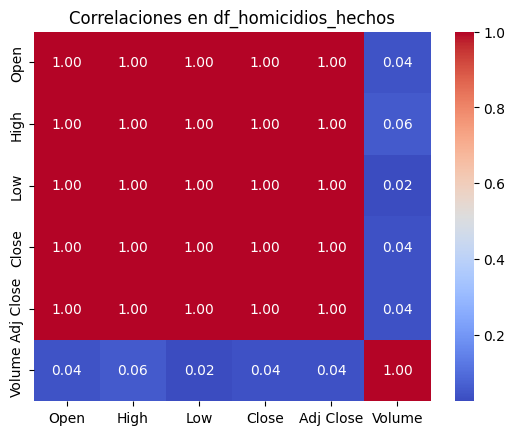

In [ ]:
# Mapa de Calor
correlacion = df_oro_usd_yahoo.corr()
correlacion = df_oro_usd_yahoo.corr(numeric_only=True)

# Matriz de correlación
if correlacion.empty:
    print("La matriz de correlación está vacía después de eliminar NaN. Revisa tus datos.")
else:
# Mapa de calor
    sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlaciones')
    plt.show()

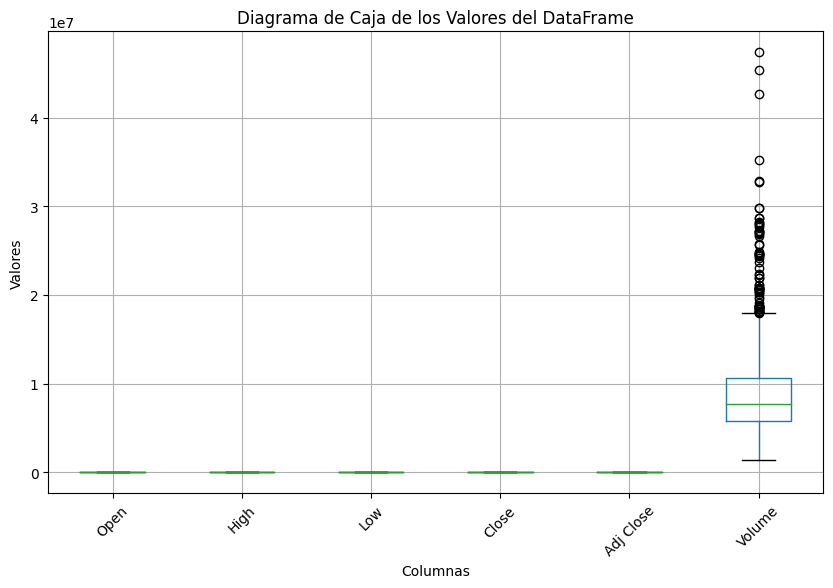

In [ ]:
# Obtiene las columnas numéricas del DataFrame
columnas_numericas = df_oro_usd_yahoo.select_dtypes(include=['float64', 'int64'])

# Calcula los valores atípicos para cada columna numérica
outliers_por_columna = {}
for columna in columnas_numericas.columns:
    valores_sin_nan = df_oro_usd_yahoo[columna].dropna()
    media_valores = valores_sin_nan.mean()
    desviacion_estandar_valores = valores_sin_nan.std()
    umbral = 3
    limite_inferior = media_valores - umbral * desviacion_estandar_valores
    limite_superior = media_valores + umbral * desviacion_estandar_valores
    outliers_por_columna[columna] = df_oro_usd_yahoo[(df_oro_usd_yahoo[columna] < limite_inferior) | (df_oro_usd_yahoo[columna] > limite_superior)]

# Crea un diagrama de caja para cada columna del DataFrame
plt.figure(figsize=(10, 6))
df_oro_usd_yahoo.boxplot()
plt.title('Diagrama de Caja de los Valores del DataFrame')
plt.xticks(rotation=45)
plt.ylabel('Valores')
plt.xlabel('Columnas')
plt.show()

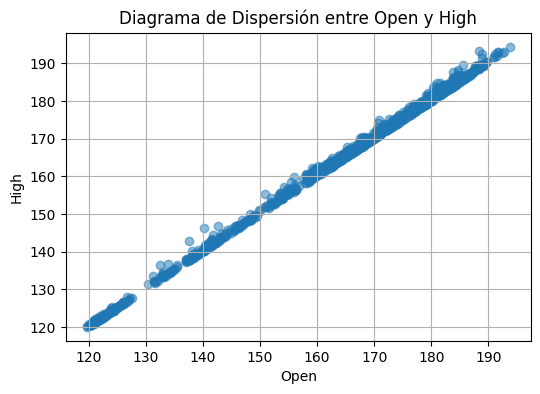

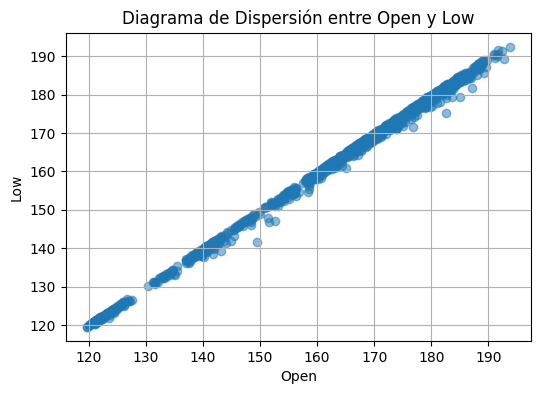

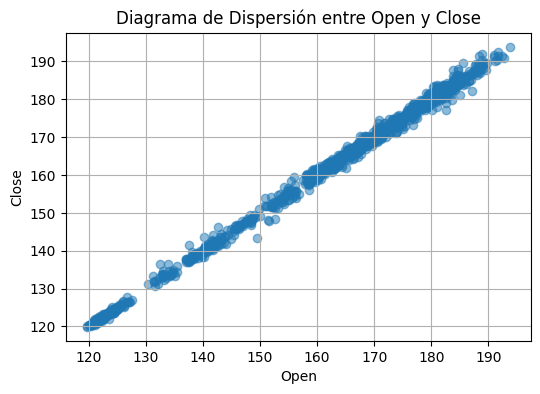

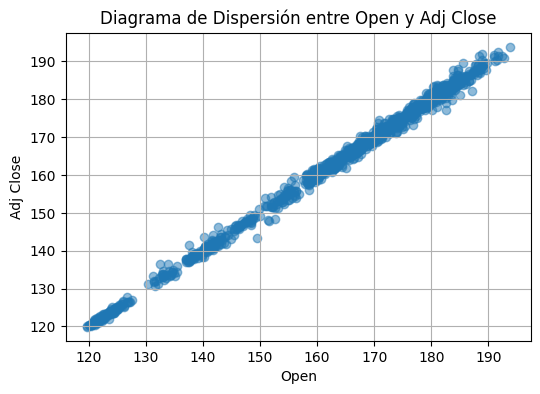

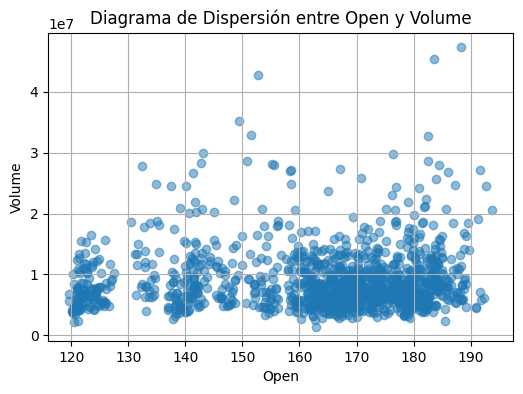

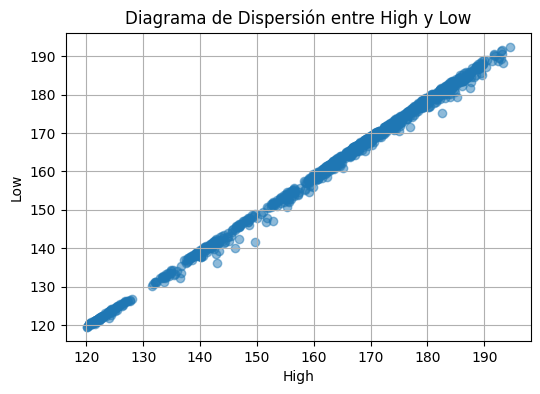

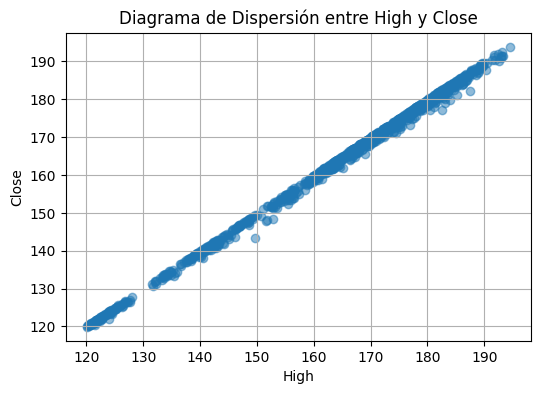

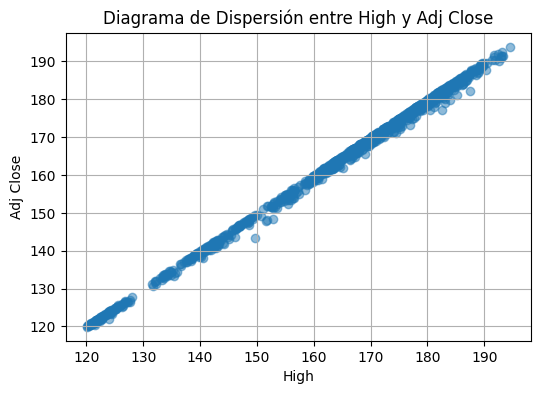

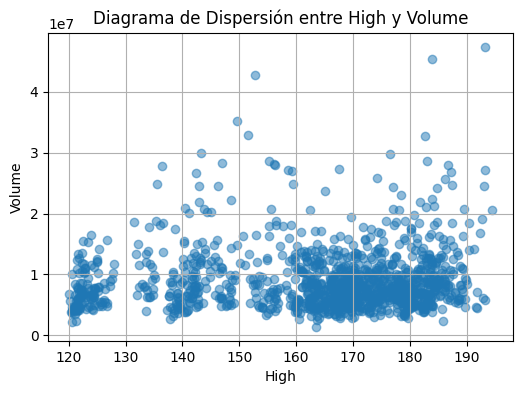

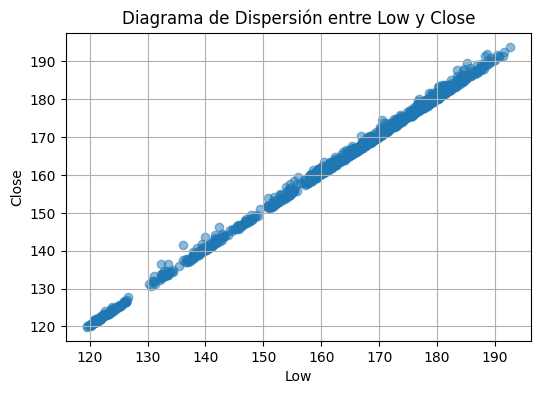

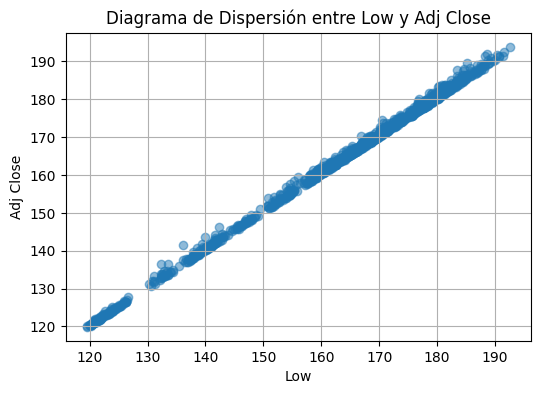

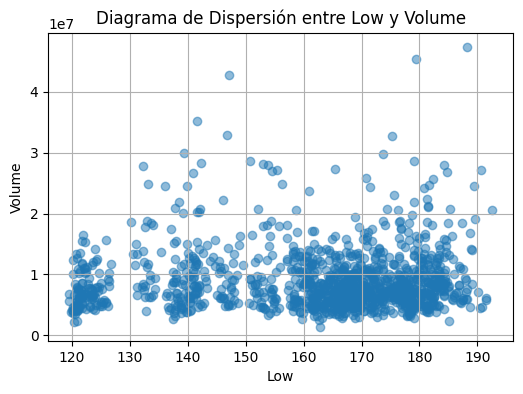

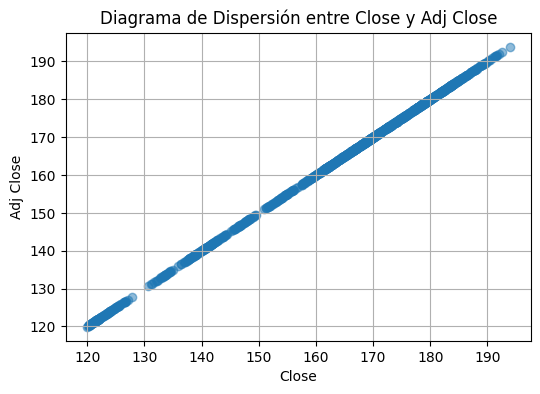

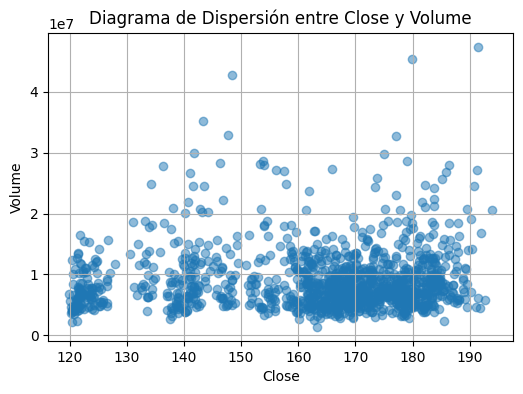

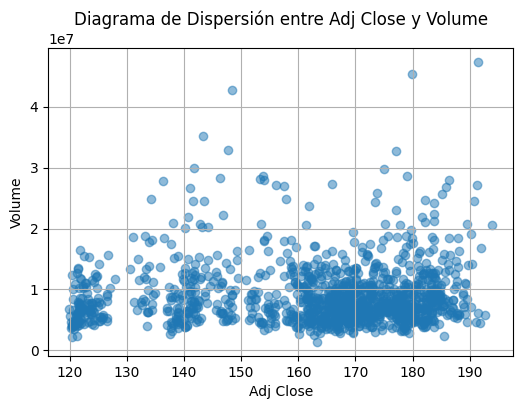

In [ ]:
# Obtiene las columnas numéricas del DataFrame
columnas_numericas = df_oro_usd_yahoo.select_dtypes(include=['float64', 'int64'])

# Crea un diagrama de dispersión para cada combinación de columnas numéricas
for i in range(len(columnas_numericas.columns)):
    for j in range(i+1, len(columnas_numericas.columns)):
        columna_x = columnas_numericas.columns[i]
        columna_y = columnas_numericas.columns[j]

        plt.figure(figsize=(6, 4))
        plt.scatter(df_oro_usd_yahoo[columna_x], df_oro_usd_yahoo[columna_y], alpha=0.5)
        plt.xlabel(columna_x)
        plt.ylabel(columna_y)
        plt.title(f'Diagrama de Dispersión entre {columna_x} y {columna_y}')
        plt.grid(True)
        plt.show()

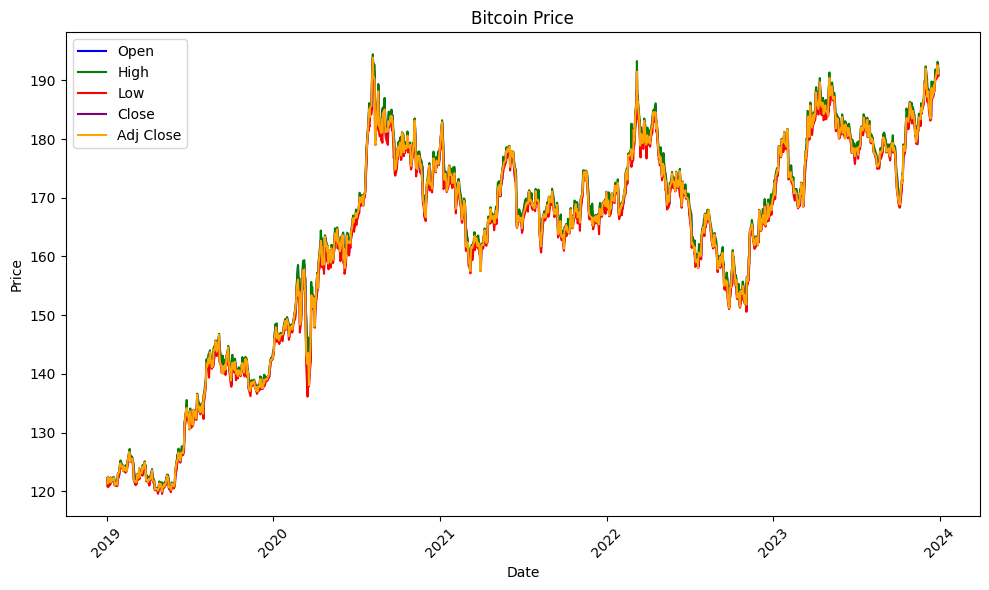

In [ ]:
plt.figure(figsize=(10, 6))

# Crea el gráfico de líneas para cada columna
plt.plot(df_oro_usd_yahoo['Date'], df_oro_usd_yahoo['Open'], label='Open', color='blue')
plt.plot(df_oro_usd_yahoo['Date'], df_oro_usd_yahoo['High'], label='High', color='green')
plt.plot(df_oro_usd_yahoo['Date'], df_oro_usd_yahoo['Low'], label='Low', color='red')
plt.plot(df_oro_usd_yahoo['Date'], df_oro_usd_yahoo['Close'], label='Close', color='purple')
plt.plot(df_oro_usd_yahoo['Date'], df_oro_usd_yahoo['Adj Close'], label='Adj Close', color='orange')

# Añade título y etiquetas de los ejes
plt.title('Bitcoin Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

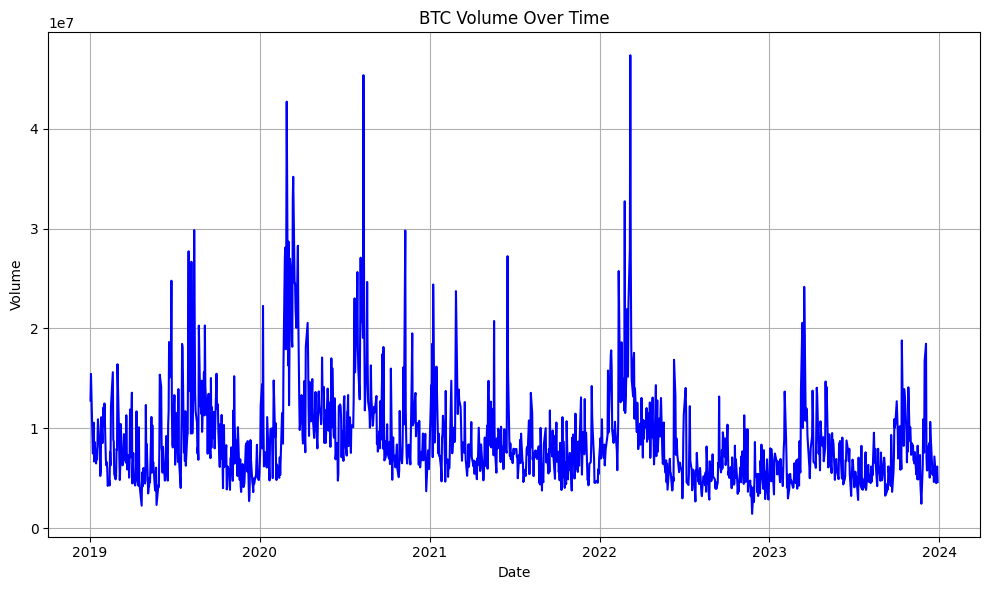

In [ ]:
# Crea un gráfico de líneas con las fechas y el volumen
plt.figure(figsize=(10, 6))
plt.plot(df_oro_usd_yahoo['Date'], df_oro_usd_yahoo['Volume'], color='blue', linestyle='-')
plt.title('BTC Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Se crea la columna con el nombre del par
df_oro_usd_yahoo['Pares']='oro/usd'

In [ ]:
df_oro_usd_yahoo.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Pares
0,2019-01-02,121.349998,121.750000,120.879997,121.330002,121.330002,12776200,oro/usd
1,2019-01-03,121.779999,122.459999,121.730003,122.430000,122.430000,15440800,oro/usd
2,2019-01-04,121.320000,121.599998,120.690002,121.440002,121.440002,13334000,oro/usd
3,2019-01-07,122.160004,122.220001,121.570000,121.860001,121.860001,7473600,oro/usd
4,2019-01-08,121.150002,121.709999,121.059998,121.529999,121.529999,7643100,oro/usd


---

**EXPORTA EL DATASET FINAL COMO ARCHIVO CSV**

---

In [ ]:
# Especifica el nombre del archivo CSV y la ruta donde deseas guardarlo
nombre_archivo_csv = 'df_oro_usd_yahoo_ETL.csv'
ruta_guardado = '/content/drive/MyDrive/c16-109-n-data-bi/Data limpia/'

# Combina la ruta y el nombre del archivo
ruta_completa = ruta_guardado + nombre_archivo_csv

# Exporta el DataFrame a un archivo CSV
df_oro_usd_yahoo.to_csv(ruta_completa, index=False)


# Imprime un mensaje de confirmación
print('DataFrame exportado exitosamente')

DataFrame exportado exitosamente
